In [30]:
import random
import matplotlib.pyplot as plt


# Create a US roulette game playing High/Low

def rollDice():
    try:
        high_low=int(input('You are playing a roulette game high/low.\nFor Low choose 1-18 \nfor High Choose 19-36:'))
    except ValueError:
        print("Not a number")
    if high_low >= 1 and high_low <= 18 :
        print("you are in... Lets roll it. good luck\n")
        roll = random.randint(0,37)
        if roll == 0:
            print('roll was 0, you lose.\n')
            return False
        elif roll == 37:
            print(roll,'roll was 00, you lose.\n')
            return False
        elif roll <= 18:
            print(roll,'roll was 1-18, you win.\n')
            return True
        elif roll > 18 and roll <= 36 :
            print(roll,'roll was 19-36, you lose! Bad luck\n')
            return False
    elif high_low > 18 and high_low <= 36 :
        print("you are in... Lets roll it. good luck\n")
        roll = random.randint(0,37)

        if roll == 0:
            print('roll was 0, you lose.\n')
            return False
        elif roll == 37:
            print(roll,'roll was 00, you lose.\n')
            return False
        elif roll <= 18:
            print(roll,'roll was 1-18, you lose. Bad luck\n')
            return False
        elif roll > 18 and roll <= 36:
            print(roll,'roll was 19-36, you won!\n')
            return True
    else:
        print("You gave invalid number. For high low you can choose only from 1-36\n")
        rollDice()


In [3]:
rollDice()

You are playing a roulette game high/low.
For Low choose 1-18 
for High Choose 19-36:17
you are in... Lets roll it. good luck

10 roll was 1-18, you win.



True

In [63]:
def rollDice_auto(val):
    if val == "High":
        high_low = 32
    else:
        high_low = 1

    if high_low >= 1 and high_low <= 18 :
        roll = random.randint(0,37)
        if roll == 0 or roll == 37 or not roll <=18:
            return False
        else:
            return True
    else:
        roll = random.randint(0,37)
        if roll == 0 or roll == 37 or roll <= 18:
            return False
        else:
            return True

In [64]:
rollDice_auto('High')

True

In [65]:
'''
Simple bettor, betting the same amount each time.
'''
def simple_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager
    currentWager = 0
    while currentWager < wager_count and value > 0:
        if rollDice():
            value += wager
        else:
            value -= wager
        currentWager += 1
        print('Funds:', value)
    if value <= 0:
        print('Funds: Broke')
    else:
        print("Funds: ", value)

In [20]:
simple_bettor(100, 1, 10)

You are playing a roulette game high/low.
For Low choose 1-18 
for High Choose 19-36:2
you are in... Lets roll it. good luck

7 roll was 1-18, you win.

Funds: 101
You are playing a roulette game high/low.
For Low choose 1-18 
for High Choose 19-36:3
you are in... Lets roll it. good luck

18 roll was 1-18, you win.

Funds: 102
You are playing a roulette game high/low.
For Low choose 1-18 
for High Choose 19-36:5
you are in... Lets roll it. good luck

8 roll was 1-18, you win.

Funds: 103
You are playing a roulette game high/low.
For Low choose 1-18 
for High Choose 19-36:18
you are in... Lets roll it. good luck

roll was 0, you lose.

Funds: 102
You are playing a roulette game high/low.
For Low choose 1-18 
for High Choose 19-36:34
you are in... Lets roll it. good luck

30 roll was 19-36, you won!

Funds: 103
You are playing a roulette game high/low.
For Low choose 1-18 
for High Choose 19-36:31
you are in... Lets roll it. good luck

18 roll was 1-18, you lose. Bad luck

Funds: 102
You

In [39]:
def simple_bettor_auto(funds,initial_wager,wager_count,pick):
    value = funds
    wager = initial_wager
    currentWager = 0
    X = []
    Y = []
    while currentWager < wager_count and value > 0:
        if rollDice_auto(pick):
            value += wager
        else:
            value -= wager
        currentWager += 1
        X.append(currentWager)
        Y.append(value)
    if value <= 0:
        print('Funds: Broke')
        return X, Y
    else:
        print("Funds: ", value)
    return X, Y


What is gonna happen if you play 10000 turns betting always in high number in a roulette game. Are you gonna win or lose in the long run?

In [44]:
X, Y = simple_bettor_auto(1000,2,10000,'High')

20
20
17
0
36
2
32
5
29
22
32
4
7
12
31
2
32
3
17
17
19
22
26
37
3
12
29
37
24
14
13
4
9
27
15
34
27
10
20
19
16
23
28
16
32
10
27
15
10
16
35
21
34
32
21
21
33
2
17
16
14
34
34
21
12
33
25
37
36
14
5
0
14
36
21
9
8
33
16
14
4
6
3
9
9
32
20
34
30
23
36
32
31
10
31
1
12
34
19
24
37
31
9
28
3
19
28
28
36
10
36
15
26
30
29
17
29
17
13
34
24
36
17
3
2
15
7
33
19
28
7
35
24
20
31
23
26
37
10
19
3
11
16
22
15
21
1
36
8
17
20
4
6
9
20
29
12
37
19
9
24
5
20
11
18
6
9
32
21
13
4
15
25
6
12
5
21
31
31
28
32
18
18
2
34
5
1
34
6
33
28
10
32
30
1
20
27
28
32
9
23
9
18
14
3
25
10
0
19
7
34
14
19
25
35
28
31
7
32
28
19
23
31
1
4
24
21
22
12
19
29
32
16
36
15
19
10
16
0
19
15
31
27
20
13
18
8
15
10
24
6
6
14
29
28
1
7
24
30
19
2
26
18
32
29
0
13
36
7
32
6
18
34
30
18
17
3
23
25
1
14
3
27
8
11
12
1
6
9
19
13
30
25
21
13
11
37
10
7
4
29
33
3
6
27
5
17
2
3
29
6
3
28
31
21
2
25
4
24
7
19
20
3
13
8
8
11
8
33
3
35
16
21
23
26
26
28
9
29
12
14
20
3
25
30
4
5
18
28
20
16
28
0
22
18
1
6
2
27
27
29
17
16
17
28


15
12
7
5
15
29
34
6
12
11
0
4
11
14
33
9
21
20
21
9
10
31
17
32
16
9
20
33
0
28
21
35
8
12
3
13
8
32
5
20
3
0
2
5
1
37
6
34
0
5
1
28
26
22
19
21
29
24
25
19
10
25
22
35
7
2
16
34
31
36
7
27
17
34
17
4
13
33
16
31
15
28
26
9
19
23
19
29
4
11
8
25
37
0
6
4
12
4
22
18
18
27
15
10
31
9
14
8
33
23
11
20
19
3
2
10
21
11
25
12
5
25
11
24
20
28
29
25
37
36
27
24
0
33
17
27
10
6
11
35
31
8
9
19
21
22
14
35
19
6
2
4
30
19
37
12
14
31
19
7
24
33
10
21
31
33
15
8
37
33
34
3
25
7
28
13
30
8
22
14
28
26
22
20
37
22
25
16
21
30
12
32
0
1
37
11
0
2
0
23
11
19
26
34
9
20
4
36
13
3
29
27
35
17
10
23
36
0
33
5
20
12
24
37
26
10
6
29
32
28
25
24
22
17
32
14
13
4
24
9
37
20
37
35
15
21
5
37
21
1
35
26
16
1
30
6
4
23
1
30
16
11
30
7
16
8
26
2
37
17
10
15
18
36
5
15
0
0
20
0
26
8
14
12
29
30
8
2
32
19
33
10
22
9
14
33
20
13
12
32
5
26
9
27
2
19
21
34
13
35
10
7
24
21
5
32
28
34
25
13
22
31
27
27
29
12
0
28
21
14
24
36
16
35
18
7
5
19
3
0
30
27
35
22
1
20
34
37
24
26
1
31
17
35
6
8
0
33
12
23
13
33
27
15
7
9

27
11
9
7
11
23
34
15
11
1
21
15
0
16
0
15
19
35
28
9
5
35
35
34
33
14
15
1
19
21
24
10
5
12
10
12
11
30
21
11
6
12
26
1
30
13
34
12
28
33
28
3
27
8
27
31
13
22
23
17
22
23
27
21
18
29
37
7
22
35
12
22
7
6
14
6
21
14
21
14
37
12
15
4
1
21
26
22
33
26
16
24
22
15
27
26
8
8
20
20
26
12
5
22
28
4
28
35
5
16
27
23
24
6
13
6
32
1
29
19
32
12
24
17
16
4
32
2
2
28
18
26
22
25
24
30
20
18
4
13
21
25
22
34
32
36
32
24
16
23
33
3
32
35
37
33
26
13
16
6
6
36
8
11
30
11
11
24
8
12
21
25
37
17
7
31
8
20
4
0
2
13
24
36
16
25
27
32
10
18
34
22
36
14
25
12
18
15
30
27
32
27
30
11
36
7
0
31
35
19
28
4
21
20
13
12
3
37
3
17
16
10
10
36
8
26
20
5
7
29
34
18
34
11
24
19
17
28
24
22
18
5
15
22
19
7
32
32
34
2
35
31
1
12
6
34
32
22
31
28
25
35
21
25
24
31
5
2
26
34
6
17
24
30
30
1
10
34
4
20
16
33
37
7
5
18
18
36
18
18
29
27
18
16
15
4
5
8
2
11
17
36
32
31
23
37
24
6
6
32
19
4
26
20
0
17
8
14
24
22
21
32
31
32
30
25
4
27
3
35
36
12
17
19
11
12
7
2
26
20
37
24
23
0
26
36
12
7
8
7
3
33
2
5
37
1
10
16
9
1
27
3

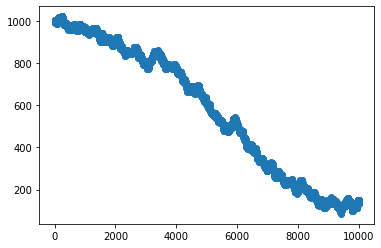

In [50]:
plt.scatter(X, Y)

As you can see as you play the game you are losing money all the time. The reason is the two 0 and 00 that exist at the US roulette table. How about playing the exact same game in Europe. In Europe there is only one green number that you will lose your money the 0. Does this change the outcome?

In [116]:
def rollDice_auto_EU(val):
    if val == "High":
        high_low = 32
    else:
        high_low = 1

    if high_low >= 1 and high_low <= 18 :
        roll = random.randint(0,36)
        if roll == 0 or not roll <=18:
            return False
        else:
            return True
    else:
        roll = random.randint(0,36)
        if roll == 0 or roll <= 18:
            return False
        else:
            return True
        
def simple_bettor_auto_EU(funds,initial_wager,wager_count,pick):
    value = funds
    wager = initial_wager
    currentWager = 0
    X = []
    Y = []
    while currentWager < wager_count and value > 0:
        if rollDice_auto_EU(pick):
            value += wager
        else:
            value -= wager
        currentWager += 1
        X.append(currentWager)
        Y.append(value)
    if value <= 0:
        print('Funds: Broke')
        return X, Y
    else:
        print("Funds: ", value)
    return X, Y



In [47]:
X_EU, Y_EU = simple_bettor_auto_EU(1000,2,10000,'High')

31
4
3
8
36
31
14
8
1
14
13
3
13
23
13
9
18
35
8
23
7
15
12
0
32
16
24
4
2
24
17
15
8
29
12
0
10
11
27
6
27
25
24
15
32
31
32
31
18
34
26
14
23
21
14
32
13
14
24
30
30
12
11
11
14
2
27
4
32
7
15
15
2
17
32
27
26
23
18
3
15
30
25
11
9
29
6
29
10
17
4
19
27
29
30
34
35
19
15
34
14
23
11
20
35
33
13
14
16
19
33
1
22
1
20
14
24
16
7
0
31
30
24
27
12
4
6
11
13
27
19
34
6
14
26
36
19
7
19
21
18
25
31
30
4
13
11
15
0
5
19
10
10
14
27
25
18
1
20
18
9
13
21
7
10
35
0
12
30
17
34
22
17
16
17
22
29
22
18
31
17
22
34
18
17
33
15
12
10
8
23
19
16
20
23
31
2
4
14
14
35
20
23
31
36
15
30
21
12
12
10
9
1
3
32
11
4
10
10
29
28
5
28
22
5
27
7
2
5
34
16
25
8
5
36
7
2
31
9
22
22
29
29
31
15
9
21
29
28
21
27
34
33
18
5
35
1
30
27
5
24
1
35
7
33
15
33
20
33
16
36
0
0
28
18
21
34
34
2
9
31
11
5
29
16
35
12
28
0
18
15
27
31
18
15
29
7
29
7
8
2
12
26
16
7
32
26
6
35
14
33
14
10
26
0
16
31
8
13
22
25
1
26
17
34
17
26
12
28
25
4
1
31
12
10
11
19
24
32
27
4
22
29
13
21
19
18
3
20
1
20
4
27
2
2
30
21
22
8
25
9
8
8

5
35
21
7
19
20
4
12
3
3
16
35
18
9
29
23
11
11
14
22
4
29
34
21
6
22
26
36
21
35
27
36
12
32
19
33
33
1
1
18
20
34
35
2
17
15
35
20
11
19
27
36
7
10
26
3
13
28
21
1
8
10
20
34
30
24
5
4
12
6
23
24
23
13
28
17
6
32
17
25
36
22
17
29
23
13
8
16
12
33
21
27
4
0
19
19
11
31
3
5
35
16
19
1
23
27
21
14
6
21
26
15
21
17
16
12
22
34
9
28
13
18
10
2
36
32
13
0
10
31
15
31
23
24
0
19
35
8
12
31
33
30
17
18
23
9
32
3
30
10
12
0
32
33
8
19
30
12
0
35
20
5
24
1
21
32
2
0
6
17
15
22
4
2
28
16
31
7
19
33
3
3
5
3
11
33
1
34
13
35
28
20
22
17
27
35
7
30
9
4
6
3
7
18
17
5
14
34
31
24
33
0
13
30
15
28
3
31
10
23
26
29
17
8
31
2
2
15
9
11
15
2
36
6
19
23
14
3
20
24
1
21
21
7
22
4
8
6
6
10
22
24
13
16
2
0
10
10
2
31
27
13
30
11
17
23
20
29
6
26
16
26
27
1
13
0
20
32
20
29
1
24
26
11
31
13
24
29
22
25
5
36
24
2
23
26
17
13
1
36
7
35
2
34
4
34
20
25
35
23
17
20
27
7
36
15
3
22
11
17
16
30
4
13
0
12
24
3
24
11
0
16
13
3
21
5
5
21
27
6
13
9
6
8
25
19
5
32
34
0
24
7
4
6
25
16
34
31
3
21
22
25
31
33
31
6
35
20


32
11
36
6
7
14
23
28
14
19
15
6
23
24
21
17
11
17
10
6
21
4
24
4
17
13
22
28
16
23
6
35
10
33
14
1
16
0
2
16
17
29
23
21
30
30
1
28
2
12
8
30
11
21
28
10
9
0
19
13
20
21
0
30
7
15
24
17
10
16
1
4
24
4
9
34
6
9
17
31
17
15
5
12
23
3
7
36
24
15
7
2
16
28
7
25
14
13
5
34
6
24
31
22
15
12
32
0
17
0
32
29
33
33
0
18
36
18
22
16
35
14
2
6
18
35
6
22
29
0
19
32
19
8
21
11
26
0
32
21
28
9
5
31
0
5
31
3
12
25
2
18
2
17
5
32
17
18
26
12
16
29
30
26
29
10
34
28
27
13
9
24
35
16
25
4
32
29
3
32
1
23
2
11
31
29
13
30
2
27
11
23
23
17
16
31
33
0
26
34
6
15
16
33
19
28
7
15
5
22
1
8
19
5
7
24
18
13
6
28
8
15
31
16
19
32
9
24
13
0
8
8
13
11
29
2
24
33
9
35
31
0
2
36
4
17
30
33
29
8
19
19
31
11
8
35
21
27
31
9
4
31
19
11
20
31
33
11
27
4
24
17
33
28
24
21
25
9
6
11
13
6
18
9
20
18
36
12
1
11
27
12
31
5
16
28
20
14
26
13
33
8
20
14
28
25
10
30
25
23
6
9
26
29
6
25
16
9
14
25
23
22
35
16
27
17
16
3
23
18
10
1
25
36
0
0
23
20
32
24
33
3
34
5
36
31
36
26
28
17
17
22
22
10
11
34
31
36
8
15
20
15
11
26
24
7

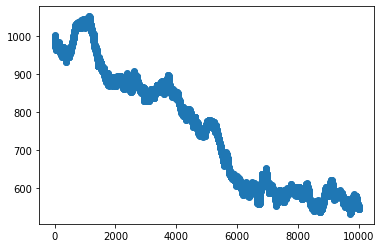

In [49]:
plt.scatter(X_EU, Y_EU)

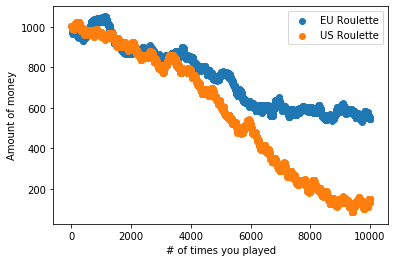

In [59]:
plt.scatter(X_EU, Y_EU, label="EU Roulette")
plt.scatter(X, Y, label="US Roulette")
plt.xlabel("# of times you played")
plt.ylabel("Amount of money")
plt.legend()

Can we find a better strategy than this one? Maybe doubling up the amount of money after each losing bet? 
And going back to our initial bet when we win.

In [77]:
def doubling_auto(funds,initial_wager,wager_count,pick):
    value = funds
    wager = initial_wager
    currentWager = 0
    X = []
    Y = []
    while currentWager < wager_count and value > 0:
        if rollDice_auto(pick):
            value += wager
            wager = initial_wager
        else:
            value -= wager
            wager = wager * 2
        currentWager += 1
        X.append(currentWager)
        Y.append(value)
    if value <= 0:
        value = 0
        print("Broke after", currentWager, "plays")
        return X, Y
    print("Still not broke?? amazing!!!")
    return X, Y



In [79]:
X_double, Y_double = doubling_auto(1000, 1, 10000, "High")

Broke after 818 plays


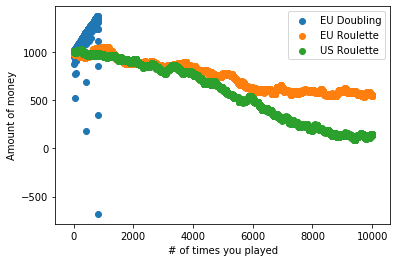

In [81]:
plt.scatter(X_double, Y_double, label="EU Doubling")
plt.scatter(X_EU, Y_EU, label="EU Roulette")
plt.scatter(X, Y, label="US Roulette")
plt.xlabel("# of times you played")
plt.ylabel("Amount of money")
plt.legend()

It seems that by doubling initially you are gaining some money but then it will come a point at which you will run broke very fast. In less than 10000 tries.

In [135]:
def doubling_auto(funds,initial_wager,wager_count,pick):
    value = funds
    wager = initial_wager
    currentWager = 0
    X = []
    Y = []
    while currentWager < wager_count and value > 0:
        if rollDice_auto(pick):
            value += wager
            wager = initial_wager
        else:
            value -= wager
            wager = wager * 2
        currentWager += 1
        X.append(currentWager)
        Y.append(value)
    if value <= 0:
        #print("Broke after", currentWager, "plays")
        return value
    #print("Still not broke?? amazing!!!")
    return value

But what is happening if you go at the casino multiple times. Are you gone be able to win at the long run or not?
In the example below one player is visiting the casino 1000 times and he is using doubling strategy. He is gonna play only 100 times per visit.

In [144]:
choise = input(" Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?\nFor automatic give auto else give manual:\nA -- Automatic,\nM -- Manual")
initial_funds = int(input('Initial Funds:'))
bet = int(input('How much money are you going to bet per turn??\n'))
times = int(input('How many times do you want to roll the Dice??\n'))
high_or_low = input("High or Low in case of automatic only:\n")

strategy = input('What strategy are you going to follow?\n Aggresive or single?\nA -- Aggresive,\n s -- Single')
X_stat_US = []
Y_stat_US = []
if choise == "A":
    x = 0
    totalsum = 0
    while x < 1000:
        if strategy == "A":
            totalsum += doubling_auto(initial_funds, bet, times, high_or_low)-initial_funds
        else:
            totalsum += simple_bettor_auto(initial_funds, bet, times, high_or_low)-initial_funds
        x = x + 1
        X_stat_US.append(x)
        Y_stat_US.append(totalsum)
    print(times, totalsum)


 Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?
For automatic give auto else give manual:
A -- Automatic,
M -- ManualA
Initial Funds:1000
How much money are you going to bet per turn??
1
How many times do you want to roll the Dice??
100
High or Low in case of automatic only:
High
What strategy are you going to follow?
 Aggresive or single?
A -- Aggresive,
 s -- SingleA
100 -17942


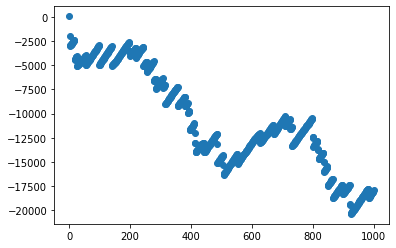

In [145]:
plt.scatter(X_stat_US, Y_stat_US)

In [180]:
def doubling_auto(funds,initial_wager,wager_count,pick):
    value = funds
    wager = initial_wager
    currentWager = 0
    X = []
    Y = []
    while currentWager < wager_count and value > 0:
        if rollDice_auto_EU(pick):
            value += wager
            wager = initial_wager
        else:
            value -= wager
            wager = wager * 2
        currentWager += 1
        X.append(currentWager)
        Y.append(value)
    if value <= 0:
        #print("Broke after", currentWager, "plays")
        return value
    #print("Still not broke?? amazing!!!")
    return value


choise = input(" Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?\nFor automatic give auto else give manual:\nA -- Automatic,\nM -- Manual")
initial_funds = int(input('Initial Funds:'))
bet = int(input('How much money are you going to bet per turn??\n'))
times = int(input('How many times do you want to roll the Dice??\n'))
high_or_low = input("High or Low in case of automatic only:\n")

strategy = input('What strategy are you going to follow?\n Aggresive or single?\nA -- Aggresive,\n s -- Single')
X_stat_EU = []
Y_stat_EU = []
if choise == "A":
    x = 0
    totalsum = 0
    while x < 1000:
        if strategy == "A":
            totalsum += doubling_auto(initial_funds, bet, times, high_or_low)-initial_funds
        else:
            totalsum += simple_bettor_auto(initial_funds, bet, times, high_or_low)-initial_funds
        x = x + 1
        X_stat_EU.append(x)
        Y_stat_EU.append(totalsum)
    print(times, totalsum)

 Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?
For automatic give auto else give manual:
A -- Automatic,
M -- ManualA
Initial Funds:1000
How much money are you going to bet per turn??
1
How many times do you want to roll the Dice??
100
High or Low in case of automatic only:
High
What strategy are you going to follow?
 Aggresive or single?
A -- Aggresive,
 s -- SingleA
100 -11818


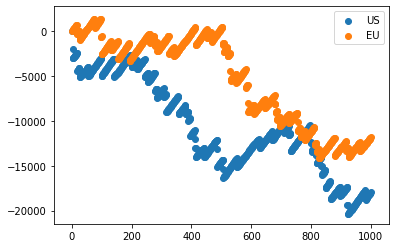

In [181]:
plt.scatter(X_stat_US, Y_stat_US, label="US")
plt.scatter(X_stat_EU, Y_stat_EU, label="EU")
plt.legend()

What about if we try to play a specific number of times every day we are going at the casino? are we gonna have any luck in the long run? Lets try 10000 visits at the casino and see the results.

In [193]:
choise = input(" Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?\nFor automatic give auto else give manual:\nA -- Automatic,\nM -- Manual")
initial_funds = int(input('Initial Funds:'))
bet = int(input('How much money are you going to bet per turn??\n'))
#times = int(input('How many times do you want to roll the Dice??\n'))
high_or_low = input("High or Low in case of automatic only:\n")

strategy = input('What strategy are you going to follow?\n Aggresive or single?\nA -- Aggresive,\n s -- Single')
X_stat_EU = []
Y_stat_EU = []
if choise == "A":
    for times in range(1, 100):
        x = 0
        totalsum = 0
        while x <= 10000:
            totalsum += doubling_auto(initial_funds, bet, times, high_or_low)-initial_funds
            x = x + 1
        print(times, totalsum)
        X_stat_EU.append(times)
        Y_stat_EU.append(totalsum)
#        X_stat_EU.append(i)
#        Y_stat_EU.append(totalsum)
    #print(times, totalsum)

 Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?
For automatic give auto else give manual:
A -- Automatic,
M -- ManualA
Initial Funds:1000
How much money are you going to bet per turn??
1
High or Low in case of automatic only:
High
What strategy are you going to follow?
 Aggresive or single?
A -- Aggresive,
 s -- SingleA
1 -247
2 -617
3 -1257
4 -1715
5 -1832
6 -2817
7 -3955
8 -5735
9 -5510
10 -15697
11 -6490
12 -11414
13 -7970
14 -20899
15 -26174
16 -15631
17 -14326
18 -13202
19 -17530
20 -28402
21 -34586
22 -11276
23 -18682
24 -28788
25 -23642
26 -17760
27 -18705
28 -37872
29 -35635
30 -46294
31 -50132
32 -37975
33 -28504
34 -25222
35 -51037
36 -56372
37 -34720
38 -47881
39 -58586
40 -85518
41 -46775
42 -51853
43 -70979
44 -80107
45 -61244
46 -82141
47 -90998
48 -68882
49 -127132
50 -54817
51 -109161
52 -51607
53 -48305
54 -74980
55 -87014
56 -99056
57 -75610
58 -91374
59 -93958
60 -92460
61 -82468
62 -77707
63 -

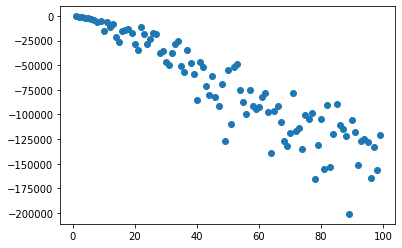

In [194]:
plt.scatter(X_stat_EU, Y_stat_EU)

If we go 10000 times at a Casino we are going to lose some money no matter how many times we are going to play the roulette. Let's try to see if by going to the casino only 100 times change the outcome.

In [202]:
choise = input(" Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?\nFor automatic give auto else give manual:\nA -- Automatic,\nM -- Manual")
initial_funds = int(input('Initial Funds:'))
bet = int(input('How much money are you going to bet per turn??\n'))
#times = int(input('How many times do you want to roll the Dice??\n'))
high_or_low = input("High or Low in case of automatic only:\n")

strategy = input('What strategy are you going to follow?\n Aggresive or single?\nA -- Aggresive,\n s -- Single')
X_stat_EU = []
Y_stat_EU = []
if choise == "A":
    for times in range(1, 100):
        x = 0
        totalsum = 0
        while x <= 100:
            totalsum += doubling_auto(initial_funds, bet, times, high_or_low)-initial_funds
            x = x + 1
        print(times, totalsum)
        X_stat_EU.append(times)
        Y_stat_EU.append(totalsum)
#        X_stat_EU.append(i)
#        Y_stat_EU.append(totalsum)
    #print(times, totalsum)

 Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?
For automatic give auto else give manual:
A -- Automatic,
M -- ManualA
Initial Funds:1000
How much money are you going to bet per turn??
1
High or Low in case of automatic only:
High
What strategy are you going to follow?
 Aggresive or single?
A -- Aggresive,
 s -- SingleA
1 -9
2 1
3 -23
4 16
5 -73
6 107
7 -17
8 281
9 161
10 97
11 -180
12 286
13 376
14 330
15 150
16 -131
17 -457
18 537
19 686
20 658
21 523
22 235
23 -510
24 -1160
25 320
26 -1141
27 -1462
28 695
29 -3
30 596
31 160
32 -268
33 -1338
34 -1783
35 -623
36 -561
37 1561
38 -1547
39 -2509
40 544
41 -2592
42 -1699
43 -3684
44 -521
45 -2130
46 1739
47 1032
48 -1084
49 -4229
50 -2423
51 -4251
52 -108
53 -934
54 -1936
55 -1828
56 307
57 1460
58 446
59 -3130
60 -2461
61 457
62 -2705
63 -5471
64 -2451
65 -5366
66 -930
67 -278
68 928
69 1456
70 -2987
71 -3990
72 -1921
73 -1790
74 1350
75 -3807
76 -1743
77 2199
78 

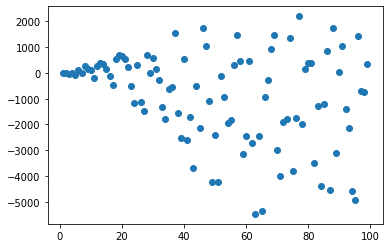

In [203]:
plt.scatter(X_stat_EU, Y_stat_EU)

It seems that by going at the Casino fewer times there is a better possibility to win some money. 
For example if you go 100 times and you play each time 77 turns then there would be a profit of 2199.
But is this a statistical error? In order to find out we will run the same code for 300 times and see what results we are getting.

In [206]:
choise = input(" Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?\nFor automatic give auto else give manual:\nA -- Automatic,\nM -- Manual")
initial_funds = int(input('Initial Funds:'))
bet = int(input('How much money are you going to bet per turn??\n'))
#times = int(input('How many times do you want to roll the Dice??\n'))
high_or_low = input("High or Low in case of automatic only:\n")
from collections import defaultdict

results = defaultdict(list)

strategy = input('What strategy are you going to follow?\n Aggresive or single?\nA -- Aggresive,\n s -- Single')
stat_EU = {}
for i in range(300):
    for times in range(1, 100):
        x = 0
        totalsum = 0
        while x <= 100:
            totalsum += doubling_auto(initial_funds, bet, times, high_or_low)-initial_funds
            x = x + 1
        print(times, totalsum)
        results[times].append(totalsum)
#        X_stat_EU.append(i)
#        Y_stat_EU.append(totalsum)
    #print(times, totalsum)

 Do you want to play turn by turn or automatically choose always High or low and see if you win or lose after some rolls?
For automatic give auto else give manual:
A -- Automatic,
M -- ManualA
Initial Funds:1000
How much money are you going to bet per turn??
1
High or Low in case of automatic only:
High
What strategy are you going to follow?
 Aggresive or single?
A -- Aggresive,
 s -- SingleA
1 -1
2 -21
3 11
4 -1
5 -67
6 66
7 -208
8 -104
9 -25
10 -116
11 55
12 286
13 -1815
14 438
15 -757
16 -1398
17 -484
18 -1364
19 528
20 -134
21 553
22 881
23 -1137
24 -2222
25 -1327
26 -1108
27 897
28 1208
29 -2029
30 -2611
31 932
32 -654
33 473
34 -1887
35 -388
36 -2915
37 1254
38 371
39 -2440
40 -534
41 705
42 -957
43 -1111
44 -1479
45 -3417
46 -320
47 -3126
48 -4407
49 817
50 -122
51 -1054
52 -3333
53 -1785
54 373
55 -730
56 -575
57 2665
58 524
59 -2781
60 298
61 -1500
62 -308
63 -603
64 225
65 -6355
66 775
67 -2256
68 -947
69 1006
70 1157
71 1145
72 -1901
73 796
74 -833
75 -7020
76 -702
77 2347
7

14 -620
15 -598
16 536
17 448
18 -214
19 378
20 814
21 516
22 -357
23 -1374
24 866
25 -2297
26 -1255
27 -2078
28 -1054
29 -68
30 -827
31 -993
32 20
33 -749
34 -891
35 421
36 1358
37 -688
38 1455
39 -1019
40 -529
41 -207
42 -1540
43 -306
44 -214
45 -2297
46 -2436
47 -391
48 -2058
49 -1274
50 1945
51 -2513
52 -790
53 -1609
54 -1808
55 294
56 1046
57 284
58 -2710
59 -3527
60 -4759
61 -469
62 -362
63 -1575
64 -1633
65 686
66 -527
67 -2370
68 -3673
69 3133
70 -2143
71 1082
72 1757
73 -6115
74 -3783
75 -909
76 1117
77 -1890
78 -2857
79 1458
80 139
81 -2454
82 -2676
83 -432
84 767
85 -6675
86 -1944
87 -2518
88 -185
89 -2067
90 33
91 1228
92 -2219
93 -201
94 2406
95 2391
96 3321
97 2243
98 4403
99 -661
1 5
2 -41
3 -4
4 -19
5 -37
6 -87
7 105
8 -281
9 -364
10 -844
11 232
12 -1705
13 439
14 -562
15 -1723
16 383
17 609
18 440
19 -285
20 -417
21 -2750
22 -1749
23 -257
24 979
25 -2357
26 -35
27 -104
28 1114
29 -2354
30 -3068
31 672
32 148
33 183
34 89
35 -1710
36 -1765
37 -1088
38 1419
39 -2518
40 7

69 1089
70 -1615
71 65
72 -1387
73 55
74 1264
75 1033
76 371
77 166
78 -913
79 -2107
80 -6971
81 -3573
82 1037
83 -170
84 -2536
85 -12469
86 -1162
87 922
88 -2291
89 -2099
90 1086
91 -1041
92 -5249
93 1064
94 -5025
95 -5005
96 -5922
97 1267
98 -7908
99 1531
1 9
2 -10
3 6
4 14
5 -116
6 100
7 -255
8 149
9 -294
10 149
11 312
12 -52
13 -790
14 -580
15 535
16 426
17 416
18 554
19 -400
20 -2274
21 759
22 -1366
23 -304
24 -181
25 -3438
26 -3147
27 -57
28 155
29 -2079
30 -746
31 188
32 -878
33 66
34 -2883
35 -2057
36 1625
37 -506
38 -431
39 -1417
40 -1512
41 -391
42 -1365
43 -3234
44 1862
45 -1054
46 -813
47 -431
48 -1277
49 -1587
50 2
51 -785
52 -1792
53 -56
54 2439
55 -2576
56 -7024
57 393
58 -5255
59 -1684
60 -2884
61 -46
62 -1678
63 2638
64 1904
65 -1220
66 -2530
67 -1142
68 3018
69 -1711
70 -97
71 -4300
72 16
73 708
74 311
75 -2274
76 -1743
77 375
78 -3887
79 425
80 2505
81 -4578
82 236
83 -3547
84 -338
85 734
86 -8558
87 -49
88 -1372
89 4101
90 -7347
91 -5458
92 142
93 2323
94 -1806
95 -

29 -1154
30 -904
31 220
32 188
33 -397
34 -1900
35 1457
36 -2547
37 415
38 660
39 -478
40 1008
41 868
42 -336
43 -1920
44 -334
45 1910
46 -3165
47 -1184
48 -4231
49 -932
50 842
51 742
52 -942
53 86
54 -1757
55 -653
56 1557
57 -677
58 -1071
59 -1717
60 -1332
61 -416
62 -270
63 720
64 810
65 -2501
66 1031
67 3003
68 -449
69 1982
70 -73
71 -1956
72 -930
73 -765
74 285
75 -844
76 -5840
77 2418
78 -2004
79 -7070
80 -1857
81 2371
82 1358
83 -732
84 285
85 826
86 1749
87 -129
88 -1009
89 891
90 957
91 641
92 1258
93 1187
94 -14
95 1738
96 -2052
97 -7929
98 -3336
99 -5786
1 -9
2 -9
3 0
4 -53
5 -55
6 68
7 -56
8 -123
9 91
10 -307
11 -51
12 -322
13 -639
14 459
15 486
16 316
17 -1006
18 599
19 308
20 407
21 -1550
22 -251
23 -216
24 715
25 -172
26 -348
27 -942
28 -1076
29 62
30 -3477
31 1020
32 1296
33 -2658
34 149
35 -654
36 1494
37 -3267
38 679
39 -811
40 -353
41 743
42 -1764
43 -376
44 -244
45 -48
46 44
47 -3287
48 1108
49 -2910
50 2211
51 -1076
52 -3095
53 -1854
54 1429
55 240
56 1073
57 509
58

80 -2533
81 -1414
82 -1595
83 -2430
84 9
85 -6339
86 1460
87 -6535
88 -2072
89 -1036
90 -1122
91 -1187
92 -2917
93 -4863
94 94
95 -2741
96 -837
97 -2903
98 -1156
99 -746
1 -9
2 -24
3 34
4 -24
5 -247
6 -192
7 -243
8 -97
9 121
10 291
11 -698
12 100
13 6
14 462
15 -793
16 -878
17 -944
18 635
19 786
20 -366
21 -1573
22 -1045
23 -1284
24 -110
25 -194
26 -1121
27 -2021
28 -2104
29 -964
30 32
31 -2165
32 -1839
33 -1093
34 -1727
35 524
36 -2593
37 561
38 -253
39 -2538
40 280
41 664
42 -5735
43 813
44 -564
45 900
46 765
47 683
48 2170
49 -1168
50 -994
51 1322
52 -332
53 621
54 1384
55 -3106
56 -678
57 -827
58 -3518
59 657
60 -5651
61 -1396
62 -3305
63 -2439
64 915
65 604
66 -3479
67 -3374
68 3197
69 -4286
70 -9365
71 -1956
72 -5014
73 1290
74 -6773
75 1975
76 -2817
77 353
78 -635
79 433
80 -3846
81 -1558
82 -1469
83 -3574
84 -4772
85 1792
86 -4113
87 1232
88 -19
89 -1140
90 -5436
91 452
92 49
93 2187
94 3338
95 273
96 -812
97 -4924
98 -1721
99 -8844
1 11
2 2
3 24
4 23
5 -21
6 -209
7 24
8 -4
9 1

46 -154
47 974
48 777
49 -13
50 -971
51 -1013
52 -1179
53 203
54 103
55 -3322
56 -571
57 -1044
58 402
59 -1583
60 -427
61 -627
62 -2148
63 -1564
64 287
65 -2360
66 956
67 -436
68 -4449
69 -966
70 962
71 1081
72 1026
73 130
74 1372
75 2347
76 -3457
77 303
78 -552
79 2317
80 2551
81 705
82 -12091
83 -484
84 2774
85 -340
86 -2338
87 -1245
88 -1256
89 -3263
90 -7853
91 -4234
92 1836
93 -3942
94 -4974
95 -781
96 1345
97 -1705
98 1195
99 -571
1 9
2 -15
3 -20
4 13
5 -29
6 -15
7 75
8 119
9 171
10 159
11 421
12 -116
13 139
14 -479
15 -646
16 450
17 604
18 441
19 -984
20 466
21 737
22 -350
23 425
24 -344
25 -636
26 -1389
27 -1993
28 52
29 35
30 -681
31 -190
32 240
33 -701
34 389
35 1313
36 694
37 -4768
38 581
39 -911
40 -2643
41 -420
42 -731
43 -3595
44 320
45 -5108
46 -3240
47 -2121
48 -2458
49 -3339
50 915
51 225
52 -2954
53 105
54 -2011
55 -49
56 -1676
57 -3658
58 1257
59 550
60 1445
61 -3478
62 -1454
63 1822
64 726
65 1658
66 953
67 -854
68 -2065
69 1924
70 -2155
71 -228
72 193
73 812
74 948

19 -415
20 -529
21 -1417
22 -273
23 -123
24 879
25 12
26 690
27 1110
28 163
29 -1963
30 -2849
31 -1061
32 -925
33 -3827
34 -3976
35 -1705
36 -586
37 -4625
38 600
39 -753
40 -525
41 -1782
42 -1125
43 -1433
44 654
45 -1110
46 -553
47 -325
48 2239
49 -72
50 -992
51 199
52 -1969
53 -4708
54 -1813
55 -3997
56 -876
57 -3137
58 -670
59 -931
60 2736
61 -4478
62 -2512
63 -3368
64 -2825
65 894
66 -87
67 -3851
68 400
69 1036
70 469
71 -2440
72 -4202
73 100
74 2478
75 3503
76 416
77 194
78 -811
79 -4273
80 -3048
81 -3415
82 -7533
83 -323
84 -4308
85 3930
86 791
87 -5374
88 -3123
89 -4321
90 -6316
91 -1071
92 2112
93 2080
94 3669
95 -998
96 -723
97 -3665
98 1469
99 -669
1 -11
2 4
3 -85
4 25
5 -175
6 -181
7 -57
8 74
9 -80
10 -328
11 275
12 -756
13 12
14 -355
15 411
16 429
17 330
18 566
19 525
20 -403
21 -782
22 -2625
23 855
24 -1042
25 -1348
26 -2199
27 917
28 162
29 87
30 745
31 889
32 10
33 904
34 -2902
35 -785
36 102
37 1314
38 274
39 -419
40 -2124
41 -2394
42 -586
43 -1232
44 573
45 -1277
46 158

75 2033
76 1393
77 225
78 335
79 -846
80 -585
81 -3530
82 2176
83 1242
84 445
85 2787
86 941
87 568
88 335
89 -1395
90 2150
91 0
92 1070
93 -2304
94 -3054
95 123
96 -2283
97 -4173
98 -815
99 1617
1 -3
2 13
3 14
4 -43
5 18
6 -36
7 20
8 146
9 166
10 172
11 139
12 -587
13 -1753
14 249
15 -404
16 593
17 -787
18 -633
19 -654
20 -335
21 -275
22 113
23 634
24 -39
25 845
26 -1176
27 821
28 -133
29 -863
30 1165
31 1264
32 -1902
33 -641
34 469
35 1432
36 -441
37 -1502
38 -967
39 1564
40 -3189
41 -200
42 1788
43 -105
44 938
45 -821
46 -68
47 -3410
48 -3385
49 -1878
50 1761
51 -2614
52 665
53 302
54 1475
55 378
56 -3869
57 1282
58 -2772
59 -1446
60 1585
61 -2545
62 -273
63 324
64 1898
65 -273
66 -196
67 -1594
68 2010
69 -1971
70 535
71 775
72 -2046
73 -742
74 -41
75 -131
76 -609
77 -614
78 -541
79 -665
80 1054
81 614
82 -5590
83 -1565
84 1766
85 -4213
86 1504
87 -85
88 -2351
89 853
90 1696
91 2107
92 -1368
93 -2976
94 -3167
95 3307
96 -1031
97 -3792
98 -795
99 627
1 -15
2 10
3 -36
4 -50
5 7
6 47
7

37 281
38 548
39 -1876
40 -1355
41 -1546
42 810
43 -3252
44 -1220
45 -47
46 36
47 -151
48 3
49 -3091
50 17
51 -2979
52 -2279
53 383
54 620
55 1006
56 -628
57 408
58 238
59 1671
60 600
61 -2788
62 -1228
63 606
64 -1397
65 2472
66 -1127
67 -99
68 -1608
69 -1642
70 2963
71 -2989
72 -4288
73 2613
74 -6462
75 1163
76 -4026
77 3674
78 495
79 -2138
80 468
81 -4780
82 1580
83 -2555
84 -4464
85 -2348
86 -1503
87 -1592
88 -3859
89 1850
90 141
91 -4144
92 -1734
93 -3395
94 -1364
95 -4834
96 2304
97 4206
98 -7031
99 1064
1 -5
2 -12
3 -25
4 11
5 -57
6 -14
7 90
8 47
9 -1251
10 -412
11 66
12 218
13 196
14 -219
15 -731
16 574
17 -468
18 -303
19 -1461
20 -2685
21 -1397
22 607
23 728
24 -2760
25 526
26 126
27 -84
28 -1851
29 -913
30 -1882
31 166
32 -1893
33 -1201
34 -1545
35 -1635
36 -691
37 -739
38 119
39 533
40 627
41 -2944
42 -400
43 -1440
44 195
45 876
46 2127
47 932
48 -2442
49 1193
50 -926
51 2195
52 1191
53 -4025
54 -1012
55 -3511
56 1998
57 406
58 -1553
59 596
60 -2393
61 -6590
62 1737
63 835
64

93 -4164
94 2483
95 -1072
96 -695
97 1024
98 329
99 -8810
1 -3
2 22
3 57
4 -43
5 -56
6 2
7 34
8 -114
9 22
10 -286
11 254
12 -660
13 -545
14 -887
15 -770
16 569
17 408
18 575
19 529
20 487
21 -2387
22 824
23 -581
24 -3830
25 62
26 23
27 -421
28 183
29 -189
30 259
31 154
32 206
33 422
34 170
35 461
36 -4337
37 -525
38 -427
39 -1423
40 -1932
41 1862
42 -2607
43 927
44 -1239
45 999
46 1952
47 -3166
48 -752
49 1065
50 2004
51 923
52 -1877
53 -1689
54 -4220
55 -793
56 1581
57 -3876
58 -506
59 593
60 -2546
61 -4457
62 -3605
63 1647
64 -5353
65 1689
66 -4919
67 1975
68 -3124
69 -65
70 -310
71 766
72 155
73 -1746
74 -4979
75 -3811
76 -1809
77 -612
78 -1141
79 431
80 -4770
81 -1522
82 -2566
83 -2824
84 -4587
85 -2784
86 2756
87 383
88 -1246
89 37
90 -507
91 -454
92 1496
93 -2000
94 -868
95 3219
96 -183
97 -1634
98 3471
99 1195
1 -1
2 7
3 -25
4 -9
5 -44
6 -150
7 -274
8 0
9 93
10 -120
11 123
12 408
13 -1735
14 475
15 639
16 -991
17 561
18 271
19 -383
20 -382
21 -1354
22 -328
23 -404
24 923
25 -162

58 -1566
59 -1223
60 -5626
61 -3682
62 -4834
63 -2432
64 2376
65 -3250
66 1954
67 -196
68 -2398
69 3065
70 -46
71 2224
72 -3243
73 -5146
74 -712
75 -755
76 -2918
77 -643
78 386
79 -2716
80 1516
81 -73
82 1680
83 -476
84 387
85 -1276
86 -2388
87 1117
88 -1238
89 -3522
90 2174
91 -969
92 40
93 1806
94 -3943
95 -8149
96 -2069
97 -4982
98 -1702
99 -3973
1 -1
2 -7
3 -40
4 -50
5 -44
6 111
7 -18
8 42
9 -304
10 314
11 -1298
12 252
13 297
14 482
15 -653
16 -497
17 589
18 563
19 -1008
20 774
21 -232
22 -3236
23 854
24 419
25 -927
26 -3320
27 -1232
28 -1294
29 114
30 -1502
31 -1257
32 1123
33 -1809
34 324
35 -1669
36 445
37 -516
38 -377
39 -1458
40 -1475
41 -2582
42 -4515
43 -1255
44 -1287
45 -1173
46 -992
47 -833
48 -1936
49 -2090
50 1058
51 -3076
52 798
53 1297
54 -762
55 -771
56 -1492
57 -3002
58 -1527
59 -450
60 1536
61 -2963
62 595
63 2841
64 1657
65 -4355
66 -1174
67 2918
68 -101
69 1952
70 -74
71 -1139
72 -1024
73 -2919
74 -4940
75 -4740
76 -3050
77 -8264
78 -518
79 -1615
80 156
81 -2249
8

32 -842
33 -945
34 -1320
35 -741
36 -2928
37 -397
38 526
39 -484
40 -2700
41 -1429
42 -1216
43 827
44 -1381
45 790
46 -2094
47 -219
48 -2219
49 -813
50 -2534
51 314
52 -678
53 321
54 1276
55 -2925
56 -1556
57 -2732
58 -2687
59 -3618
60 -4580
61 -591
62 -2463
63 777
64 -235
65 -64
66 901
67 -3465
68 -1187
69 -35
70 14
71 -3165
72 1241
73 1047
74 971
75 -5853
76 772
77 334
78 -2856
79 -4888
80 -437
81 3681
82 -6196
83 -1595
84 813
85 1969
86 -4659
87 -4256
88 -4017
89 24
90 -103
91 -2092
92 -4396
93 -1494
94 -707
95 -4929
96 -3994
97 177
98 193
99 -1986
1 5
2 21
3 36
4 -3
5 22
6 3
7 -22
8 -7
9 -659
10 3
11 271
12 416
13 -674
14 322
15 490
16 303
17 -2747
18 436
19 371
20 324
21 674
22 663
23 -289
24 980
25 -1600
26 -203
27 -1169
28 923
29 1222
30 87
31 -1768
32 40
33 349
34 -222
35 -884
36 277
37 -662
38 -1207
39 1515
40 262
41 -3052
42 -4259
43 -1306
44 -1239
45 -24
46 1757
47 -946
48 2086
49 -1278
50 109
51 -872
52 2074
53 -2157
54 387
55 1298
56 -2718
57 1523
58 -60
59 -796
60 -2600
6

93 -917
94 3817
95 -7061
96 1965
97 -1702
98 -942
99 -1587
1 -1
2 8
3 11
4 -42
5 106
6 -238
7 52
8 142
9 -120
10 175
11 -132
12 324
13 341
14 -721
15 169
16 382
17 -1159
18 -526
19 -527
20 385
21 -711
22 -151
23 196
24 815
25 -1074
26 798
27 -2663
28 -872
29 -1072
30 1266
31 -3034
32 -1997
33 423
34 -925
35 -1975
36 -847
37 1400
38 -386
39 1199
40 -1714
41 -254
42 -2228
43 494
44 -2275
45 -1387
46 -643
47 -4779
48 -541
49 -1284
50 -911
51 -1086
52 -1870
53 -1734
54 -909
55 -686
56 84
57 -465
58 2439
59 -2629
60 2582
61 -918
62 704
63 -610
64 -1593
65 -803
66 -4410
67 1700
68 -6643
69 65
70 -2062
71 -1231
72 -1862
73 2382
74 -60
75 -3936
76 2264
77 -3181
78 1382
79 -3766
80 -165
81 -457
82 516
83 -5411
84 164
85 -3418
86 936
87 865
88 1977
89 -3503
90 486
91 -2225
92 -5058
93 -4009
94 -1736
95 1150
96 -2939
97 3460
98 -2905
99 -2615
1 1
2 -39
3 -13
4 -2
5 -35
6 -13
7 -260
8 -52
9 -23
10 -1144
11 44
12 146
13 228
14 427
15 577
16 498
17 -2175
18 145
19 111
20 -2697
21 667
22 -2308
23 369

61 14
62 1618
63 633
64 -489
65 1911
66 -1160
67 1991
68 -5306
69 -3148
70 -964
71 -5130
72 -6295
73 3199
74 -2839
75 -991
76 2281
77 1420
78 -8025
79 -492
80 -8913
81 -4671
82 -2692
83 -5608
84 3899
85 -5656
86 2995
87 -4326
88 -5690
89 1771
90 -1141
91 2882
92 -1867
93 -983
94 -2999
95 2235
96 1039
97 -7120
98 1429
99 -2087
1 -9
2 -13
3 16
4 -28
5 -141
6 19
7 -206
8 235
9 190
10 159
11 77
12 374
13 285
14 507
15 434
16 -538
17 -928
18 -1447
19 618
20 -644
21 -353
22 -228
23 -2161
24 -3105
25 -1136
26 573
27 1107
28 186
29 774
30 -6
31 -1002
32 -873
33 -1976
34 -98
35 -2395
36 413
37 384
38 455
39 1370
40 -851
41 -3773
42 -1377
43 -1275
44 -2416
45 -416
46 -3265
47 -1082
48 -2230
49 167
50 -4436
51 -129
52 177
53 -1278
54 -5240
55 -1731
56 1256
57 -888
58 -2999
59 -1481
60 463
61 -2291
62 1719
63 -752
64 556
65 -280
66 -2522
67 -4255
68 -273
69 -3230
70 -993
71 1127
72 -1017
73 1175
74 -5197
75 -8292
76 -650
77 -6214
78 -576
79 1620
80 -542
81 -4583
82 -5661
83 -323
84 -4404
85 -2201


21 -3090
22 774
23 -138
24 -1101
25 677
26 -321
27 -1148
28 -829
29 1260
30 -274
31 -1821
32 -2233
33 -668
34 100
35 -1635
36 -527
37 397
38 1637
39 -955
40 -1459
41 1465
42 -4768
43 -535
44 -3725
45 -15
46 -89
47 1990
48 -3170
49 -3449
50 -312
51 -1855
52 -2962
53 -999
54 -2247
55 396
56 310
57 -3046
58 1534
59 1289
60 -95
61 -3642
62 -4469
63 -232
64 1892
65 -2504
66 -2199
67 -2074
68 -58
69 1098
70 14
71 -1100
72 -1783
73 -1780
74 -1023
75 -1887
76 1473
77 5
78 -2920
79 -3662
80 2138
81 -2055
82 -3424
83 -910
84 690
85 -217
86 -2358
87 -1305
88 -1192
89 -4642
90 -3622
91 -4233
92 2138
93 1090
94 1200
95 2255
96 -1180
97 1181
98 -2945
99 1267
1 3
2 8
3 46
4 -45
5 -20
6 91
7 82
8 4
9 18
10 -35
11 -795
12 136
13 -826
14 200
15 -557
16 -1019
17 -37
18 -424
19 0
20 549
21 -1476
22 773
23 -3133
24 897
25 -1202
26 -23
27 -113
28 770
29 -1049
30 10
31 -1420
32 -3062
33 1261
34 -2507
35 1456
36 -610
37 -386
38 121
39 -498
40 597
41 -394
42 -2542
43 393
44 -2278
45 876
46 785
47 -4108
48 -328

79 -4804
80 1693
81 -1552
82 -3861
83 -1445
84 -5836
85 -4558
86 726
87 497
88 -3433
89 -3329
90 -521
91 -2087
92 2524
93 -3038
94 -1896
95 763
96 -700
97 -5017
98 -653
99 -578
1 -7
2 -21
3 -37
4 10
5 -45
6 -92
7 -13
8 135
9 -107
10 36
11 -883
12 225
13 -628
14 -770
15 -155
16 -350
17 268
18 -483
19 572
20 772
21 745
22 722
23 907
24 -131
25 -1189
26 1057
27 1112
28 626
29 974
30 1068
31 1343
32 945
33 58
34 -680
35 1294
36 -843
37 1556
38 -622
39 -909
40 106
41 -3679
42 -410
43 -2364
44 -1093
45 878
46 -3250
47 719
48 -2055
49 -5681
50 -103
51 -933
52 -1045
53 -2877
54 651
55 -3069
56 421
57 465
58 264
59 -2565
60 -612
61 -1861
62 -1976
63 555
64 -504
65 -2121
66 -3260
67 1906
68 -3283
69 -2173
70 -4305
71 -949
72 1195
73 198
74 -1284
75 2143
76 -1728
77 1463
78 -5822
79 -2828
80 -5680
81 -512
82 749
83 431
84 -3488
85 2674
86 2863
87 1331
88 -3345
89 887
90 -7642
91 -4326
92 -1020
93 98
94 1040
95 -4620
96 -3545
97 364
98 -822
99 1467
1 3
2 7
3 34
4 12
5 0
6 -137
7 49
8 77
9 40
10 21

48 -4307
49 -2094
50 -1011
51 -3035
52 1090
53 -813
54 -850
55 1175
56 2438
57 583
58 -2888
59 -752
60 591
61 481
62 -1719
63 1712
64 -217
65 823
66 -4815
67 -3434
68 1658
69 -269
70 -995
71 -1514
72 -2582
73 251
74 2114
75 -799
76 -2161
77 -3823
78 -366
79 1522
80 -3625
81 2621
82 687
83 -242
84 -6485
85 -2724
86 -4663
87 -2926
88 -1262
89 -1191
90 -1354
91 -1952
92 -4150
93 283
94 -4963
95 -1791
96 584
97 193
98 -3986
99 -1573
1 9
2 31
3 23
4 -23
5 -69
6 -79
7 58
8 -116
9 175
10 191
11 -297
12 207
13 153
14 -1526
15 472
16 353
17 -2645
18 387
19 -1382
20 486
21 445
22 276
23 980
24 -670
25 -1408
26 -119
27 -997
28 -379
29 1147
30 -1021
31 216
32 -1864
33 -1692
34 -405
35 1008
36 -513
37 585
38 -1907
39 364
40 649
41 -345
42 -3571
43 -1402
44 -381
45 944
46 -3272
47 -142
48 -979
49 2073
50 -2126
51 -1192
52 1182
53 59
54 -2853
55 -578
56 -656
57 -695
58 -3773
59 -4912
60 -269
61 -2487
62 -3820
63 646
64 1793
65 1932
66 -72
67 -63
68 -1241
69 780
70 1001
71 -43
72 1111
73 -2990
74 192


99 -3989
1 9
2 -12
3 -14
4 2
5 -6
6 88
7 84
8 -349
9 119
10 128
11 -699
12 -1050
13 460
14 452
15 450
16 -896
17 -699
18 341
19 -1203
20 -545
21 -599
22 935
23 -1638
24 505
25 -745
26 -1429
27 -248
28 18
29 -2396
30 -270
31 -2350
32 1202
33 129
34 -1647
35 384
36 -175
37 580
38 1416
39 -401
40 1687
41 -1998
42 -1355
43 1785
44 112
45 -2193
46 812
47 -1136
48 1982
49 189
50 -133
51 -4293
52 -1842
53 -722
54 -2009
55 1401
56 2547
57 501
58 460
59 -603
60 362
61 -1677
62 -1656
63 -255
64 644
65 32
66 560
67 933
68 -80
69 1129
70 -3099
71 -2024
72 -8318
73 1242
74 -816
75 -2291
76 -1736
77 402
78 998
79 1197
80 -3790
81 -2801
82 785
83 1365
84 2496
85 -2263
86 -4521
87 -3232
88 -2201
89 2773
90 -7483
91 996
92 -2102
93 -3005
94 -5291
95 292
96 -5007
97 -1987
98 3600
99 -7135
1 -1
2 -24
3 -38
4 -43
5 21
6 -9
7 -317
8 -273
9 -62
10 -212
11 -958
12 -516
13 -141
14 436
15 -265
16 459
17 -679
18 456
19 -2113
20 -1277
21 596
22 -2332
23 -791
24 807
25 844
26 -2082
27 -3327
28 486
29 124
30 224
3

68 -61
69 -151
70 -27
71 -1942
72 -2957
73 -1948
74 -2902
75 -710
76 -184
77 -2757
78 93
79 -2129
80 -3547
81 1190
82 -4844
83 -2566
84 619
85 -5451
86 -372
87 -5329
88 979
89 -1130
90 1600
91 -2673
92 -943
93 -6045
94 1210
95 2049
96 -96
97 -2973
98 -1674
99 -3880
1 -13
2 -5
3 -29
4 -46
5 1
6 114
7 -99
8 -126
9 67
10 -925
11 -42
12 219
13 427
14 -876
15 321
16 458
17 -893
18 -1352
19 522
20 -1502
21 -228
22 -2429
23 835
24 830
25 -1235
26 -2007
27 -1042
28 1193
29 -4342
30 -625
31 -1799
32 247
33 -1623
34 -749
35 -878
36 1541
37 -1580
38 555
39 -2018
40 -628
41 -1886
42 1582
43 519
44 -3258
45 -352
46 -3954
47 1088
48 991
49 1091
50 1106
51 2258
52 1205
53 -2388
54 -3728
55 -1697
56 1294
57 -3231
58 -726
59 -604
60 -3504
61 -1656
62 2740
63 -6373
64 -344
65 -1152
66 -2513
67 3115
68 618
69 -308
70 1408
71 -972
72 1153
73 2263
74 215
75 -5058
76 1336
77 -813
78 3164
79 -2618
80 -480
81 -441
82 -5774
83 805
84 1258
85 -274
86 850
87 -3218
88 -1083
89 -1092
90 -268
91 -2983
92 -5188
93 1

37 -3063
38 -542
39 -1619
40 -1123
41 731
42 -1279
43 -1731
44 -2350
45 442
46 -2178
47 -2041
48 -1357
49 -31
50 -3403
51 -2074
52 166
53 1341
54 -5020
55 1304
56 1288
57 -877
58 -1527
59 -519
60 -1898
61 -5783
62 -2593
63 1543
64 -5269
65 -2247
66 -307
67 1471
68 956
69 -1542
70 -3106
71 3146
72 1303
73 -1316
74 1224
75 2382
76 1158
77 431
78 2527
79 -1575
80 1652
81 -3565
82 -2565
83 -505
84 -3331
85 1494
86 2607
87 -2321
88 -4263
89 -228
90 -1027
91 -889
92 -1414
93 125
94 -1804
95 -7921
96 336
97 -925
98 -6684
99 -686
1 -9
2 5
3 21
4 -2
5 34
6 82
7 74
8 -110
9 63
10 -1001
11 79
12 -107
13 404
14 405
15 -805
16 -276
17 661
18 654
19 773
20 -1320
21 735
22 686
23 857
24 -6
25 -1072
26 909
27 -935
28 56
29 -1144
30 -1973
31 -2768
32 233
33 -1692
34 1346
35 -1974
36 -550
37 1337
38 -2806
39 840
40 -2397
41 1798
42 -189
43 628
44 -1419
45 -2232
46 1623
47 -2188
48 1054
49 -1501
50 150
51 -2851
52 -1059
53 1206
54 1343
55 1108
56 -1842
57 -1554
58 1656
59 473
60 265
61 -1155
62 338
63 -1

96 642
97 -2879
98 -6074
99 -732
1 -7
2 -5
3 24
4 -125
5 106
6 31
7 -418
8 -39
9 88
10 227
11 69
12 -1844
13 180
14 -715
15 -694
16 478
17 -2410
18 -591
19 723
20 -284
21 184
22 -238
23 843
24 -204
25 -50
26 12
27 -1130
28 1082
29 -25
30 1039
31 124
32 1096
33 -2099
34 319
35 1014
36 -896
37 -4199
38 -2629
39 515
40 -1143
41 -4605
42 -2993
43 -1474
44 866
45 1081
46 -1484
47 -1187
48 -2055
49 0
50 -231
51 -1009
52 -1235
53 -59
54 1423
55 63
56 1338
57 490
58 2727
59 -1493
60 -940
61 -1770
62 -6568
63 -341
64 380
65 -881
66 -172
67 895
68 -107
69 -4137
70 -5248
71 -1116
72 -90
73 -2244
74 -877
75 -907
76 -694
77 -1701
78 -7049
79 -2559
80 -3594
81 -1463
82 -174
83 -4337
84 -1336
85 -441
86 -2810
87 -1344
88 -1257
89 -1240
90 -1304
91 -1401
92 -4168
93 -1196
94 1076
95 -4136
96 -2001
97 303
98 2421
99 2200
1 -3
2 45
3 14
4 76
5 -56
6 -155
7 -49
8 -130
9 196
10 166
11 -1734
12 261
13 -51
14 306
15 -1165
16 666
17 -1371
18 119
19 -1662
20 688
21 -338
22 -177
23 -1376
24 -2104
25 -417
26 -1

58 -10
59 -2143
60 523
61 -3839
62 -269
63 789
64 -1312
65 -1359
66 -2264
67 -2086
68 1795
69 -5476
70 -5662
71 2225
72 2014
73 -782
74 -4794
75 -605
76 -2805
77 -761
78 -1158
79 567
80 -738
81 -2502
82 580
83 -4117
84 -1375
85 926
86 -2922
87 777
88 -3732
89 -2935
90 24
91 -5299
92 4404
93 1242
94 2235
95 150
96 -3800
97 1593
98 -592
99 -701
1 17
2 6
3 -32
4 2
5 -56
6 -57
7 -124
8 67
9 217
10 -172
11 -1885
12 -261
13 -328
14 -663
15 -602
16 -436
17 -794
18 656
19 -797
20 -734
21 -347
22 -427
23 954
24 -525
25 -1005
26 -949
27 55
28 960
29 -4069
30 657
31 1341
32 1162
33 1389
34 -274
35 -861
36 1523
37 1271
38 -1467
39 -402
40 -368
41 -667
42 -2448
43 -231
44 1768
45 -1379
46 -2222
47 -4163
48 0
49 1043
50 -1954
51 -799
52 -880
53 1315
54 -1303
55 329
56 2161
57 207
58 87
59 582
60 179
61 552
62 -4611
63 -365
64 -313
65 -151
66 806
67 -1744
68 1184
69 -359
70 -1266
71 513
72 -23
73 63
74 -3860
75 -1859
76 1301
77 416
78 448
79 357
80 2713
81 -1617
82 -399
83 -281
84 -2211
85 3870
86 29

31 1163
32 -1167
33 1282
34 -2028
35 -933
36 -797
37 348
38 -1755
39 -725
40 -4473
41 -1957
42 -2252
43 578
44 -1380
45 -2294
46 -163
47 -2043
48 0
49 -141
50 -1696
51 -864
52 1221
53 59
54 -1604
55 374
56 2258
57 1505
58 -1458
59 1695
60 1610
61 -1560
62 1295
63 2930
64 -3782
65 750
66 -2195
67 -622
68 -1503
69 53
70 -6186
71 -126
72 1062
73 1348
74 226
75 -874
76 -958
77 -843
78 -3701
79 -2189
80 2757
81 1668
82 1666
83 -4716
84 -3508
85 2458
86 -341
87 -5431
88 -2121
89 979
90 -1096
91 362
92 -1194
93 -1933
94 -1301
95 -859
96 2535
97 -3604
98 -1969
99 -959
1 -1
2 29
3 -48
4 42
5 -17
6 0
7 -62
8 -144
9 332
10 278
11 271
12 41
13 -1077
14 -620
15 -488
16 551
17 464
18 -1191
19 403
20 -1363
21 -1301
22 -310
23 516
24 -278
25 -319
26 -296
27 -2256
28 -1320
29 -1437
30 -858
31 -2039
32 1112
33 -651
34 -1663
35 -532
36 -800
37 -1955
38 -2991
39 470
40 -1353
41 -246
42 816
43 -2670
44 -2486
45 -1194
46 -3127
47 -186
48 864
49 -1153
50 402
51 320
52 -2890
53 315
54 2240
55 401
56 80
57 183

90 45
91 -35
92 -6943
93 -4556
94 -1828
95 -5903
96 -3076
97 -743
98 -2030
99 2434
1 7
2 -20
3 -11
4 28
5 -16
6 -63
7 -223
8 -257
9 -104
10 331
11 -9
12 232
13 -878
14 -302
15 -795
16 -461
17 -500
18 -341
19 -545
20 510
21 213
22 525
23 -37
24 -2562
25 924
26 -954
27 -1051
28 -1000
29 55
30 -150
31 -2865
32 -3227
33 370
34 -2699
35 -3814
36 255
37 -422
38 670
39 435
40 -1260
41 -1860
42 1916
43 1424
44 -1441
45 -96
46 683
47 142
48 -91
49 -904
50 -2216
51 -2
52 -136
53 -732
54 -1399
55 -640
56 -1745
57 -1591
58 -772
59 -5609
60 -574
61 1562
62 -2549
63 1670
64 -3365
65 1711
66 3038
67 852
68 -1288
69 -1112
70 -51
71 -384
72 -3112
73 -2918
74 2184
75 -166
76 -737
77 -2695
78 -1686
79 -4220
80 437
81 971
82 -7673
83 -2484
84 -7613
85 -5646
86 -173
87 -4521
88 -425
89 -461
90 1918
91 -669
92 12
93 2093
94 -245
95 2461
96 1420
97 -960
98 -1586
99 366
1 -7
2 -12
3 -51
4 -56
5 -126
6 -109
7 -132
8 -246
9 246
10 -190
11 88
12 -207
13 379
14 -1901
15 313
16 222
17 -828
18 636
19 343
20 791
21 

56 -599
57 -4436
58 -2061
59 189
60 -2446
61 656
62 724
63 -503
64 -1120
65 2756
66 -597
67 -439
68 577
69 -3087
70 -3088
71 892
72 -403
73 -413
74 -720
75 -7271
76 2560
77 -199
78 1527
79 -3770
80 2670
81 -3554
82 -4527
83 -5837
84 -200
85 -3300
86 -1579
87 1833
88 -2037
89 -45
90 -7201
91 -983
92 -1803
93 2315
94 -6626
95 -1828
96 687
97 -3935
98 -1709
99 -5754
1 -15
2 8
3 -59
4 59
5 -61
6 24
7 134
8 -382
9 227
10 -231
11 -826
12 209
13 243
14 -1739
15 526
16 590
17 -539
18 670
19 -503
20 595
21 -982
22 752
23 618
24 1125
25 -603
26 776
27 -120
28 100
29 117
30 -1591
31 -841
32 1142
33 -223
34 -699
35 -1595
36 -608
37 -544
38 -756
39 -3634
40 443
41 -1377
42 -2424
43 -1343
44 -264
45 -391
46 -93
47 1473
48 1602
49 -3290
50 -154
51 942
52 -2399
53 -3986
54 -1064
55 312
56 -1007
57 -21
58 -435
59 -3689
60 1606
61 -3566
62 -2690
63 -1304
64 -2874
65 -4530
66 -22
67 -2370
68 1087
69 -1742
70 -340
71 2033
72 3312
73 713
74 130
75 -1175
76 1963
77 -5802
78 1935
79 -3445
80 -3451
81 390
82 

25 -114
26 -2545
27 -595
28 -1378
29 -3092
30 112
31 1180
32 1231
33 -777
34 367
35 -2795
36 -678
37 482
38 -3679
39 -1508
40 -2339
41 598
42 -1268
43 147
44 -88
45 -2298
46 -110
47 -1893
48 2133
49 -944
50 -1533
51 -909
52 -3460
53 -1020
54 2166
55 2406
56 -2808
57 375
58 -4088
59 43
60 296
61 -3401
62 -2547
63 -1397
64 -2594
65 436
66 256
67 2074
68 -5927
69 -2094
70 -5257
71 -2790
72 -834
73 -3842
74 -2778
75 347
76 -2733
77 2134
78 1539
79 -2707
80 798
81 3733
82 -734
83 -4614
84 -238
85 -799
86 1602
87 -7338
88 -1325
89 -2501
90 -3149
91 -2096
92 3195
93 -5046
94 2263
95 -203
96 -5417
97 2338
98 -3810
99 -2721
1 -9
2 -3
3 19
4 -94
5 13
6 -133
7 -172
8 263
9 -320
10 198
11 306
12 176
13 219
14 -878
15 238
16 -796
17 -814
18 -448
19 -323
20 820
21 -289
22 147
23 -1776
24 580
25 -2359
26 -1020
27 -3636
28 -874
29 1288
30 1043
31 -357
32 -855
33 341
34 -2797
35 91
36 -2024
37 -1038
38 -410
39 370
40 1716
41 -420
42 -3784
43 -335
44 -641
45 737
46 11
47 -3165
48 -3336
49 2129
50 -1026


77 -1833
78 -1827
79 2379
80 -592
81 -478
82 -3474
83 -620
84 567
85 -2599
86 2446
87 -3428
88 -4471
89 -320
90 -3052
91 1075
92 1110
93 320
94 166
95 -2453
96 2255
97 -4901
98 -1192
99 -5929
1 -11
2 -2
3 0
4 17
5 -109
6 -11
7 30
8 -706
9 -269
10 228
11 148
12 48
13 263
14 -132
15 524
16 274
17 261
18 608
19 473
20 745
21 -1172
22 -248
23 373
24 -672
25 973
26 -360
27 -1316
28 1158
29 -1011
30 -883
31 772
32 303
33 13
34 -642
35 -642
36 -529
37 -590
38 1021
39 643
40 -1425
41 -3798
42 879
43 905
44 -259
45 -3205
46 -2734
47 -68
48 2192
49 -2271
50 -1035
51 1184
52 -5970
53 -707
54 -3917
55 432
56 -2504
57 -1807
58 -2707
59 -679
60 -1525
61 -2689
62 -1002
63 -1041
64 -2292
65 -4473
66 723
67 646
68 -100
69 2137
70 -6002
71 -1277
72 -2803
73 2255
74 -5119
75 2186
76 1507
77 -721
78 -779
79 -3556
80 1486
81 -1606
82 -3569
83 -300
84 -2616
85 -5726
86 1973
87 2843
88 1848
89 430
90 -259
91 130
92 -2920
93 -2472
94 -3996
95 139
96 1328
97 -1954
98 -3925
99 -2433
1 -9
2 12
3 -8
4 -58
5 -40
6

35 936
36 -503
37 1107
38 -1433
39 -724
40 -3644
41 -2526
42 1543
43 -1135
44 -1474
45 886
46 587
47 1099
48 93
49 504
50 40
51 1205
52 -795
53 -4150
54 -577
55 -3176
56 1526
57 355
58 427
59 -2631
60 -3003
61 -1427
62 -359
63 -2395
64 1713
65 -4560
66 -185
67 -398
68 -1587
69 -3013
70 -3354
71 1272
72 857
73 1097
74 -3716
75 1953
76 410
77 -4025
78 1521
79 -1938
80 1560
81 -8207
82 -4380
83 1522
84 -393
85 -4366
86 -188
87 -659
88 -302
89 -93
90 -4349
91 -10082
92 -1002
93 -2915
94 -1747
95 -1354
96 -4853
97 -3828
98 -7616
99 223
1 -7
2 -4
3 -30
4 27
5 18
6 -89
7 76
8 110
9 190
10 311
11 354
12 268
13 222
14 165
15 -20
16 580
17 174
18 355
19 -216
20 -1264
21 503
22 -1880
23 -2243
24 -439
25 -982
26 -1651
27 92
28 -1327
29 667
30 -318
31 314
32 238
33 1361
34 -1713
35 -1520
36 -1173
37 596
38 1519
39 415
40 697
41 527
42 -227
43 874
44 209
45 -2285
46 -1274
47 -3114
48 -1039
49 -1042
50 1151
51 -2481
52 1550
53 -149
54 -1992
55 -796
56 1412
57 2455
58 -2369
59 593
60 -2072
61 1990
62 

89 -7376
90 -4333
91 -1142
92 203
93 -9209
94 -919
95 -1339
96 -901
97 -5901
98 -1917
99 -1789
1 1
2 -8
3 23
4 -6
5 10
6 91
7 -220
8 118
9 -539
10 -728
11 248
12 -388
13 -698
14 473
15 -633
16 349
17 471
18 -947
19 115
20 355
21 -184
22 -385
23 -190
24 470
25 -2361
26 1061
27 -21
28 -1317
29 214
30 -980
31 1292
32 314
33 225
34 612
35 1645
36 -542
37 514
38 -385
39 -1367
40 -2672
41 1852
42 1577
43 -2769
44 639
45 18
46 -2220
47 -287
48 -1543
49 967
50 -229
51 1270
52 969
53 1112
54 -777
55 -703
56 -1712
57 -3856
58 2645
59 570
60 1609
61 -359
62 -2402
63 1655
64 -1708
65 -294
66 -388
67 3055
68 1352
69 2035
70 -68
71 -3432
72 -6685
73 2334
74 -3906
75 -311
76 -3795
77 413
78 -720
79 2351
80 -3690
81 -6810
82 -1726
83 1700
84 -763
85 -2319
86 -660
87 540
88 -2303
89 873
90 777
91 -5299
92 -3183
93 2142
94 -3435
95 2174
96 2174
97 -6871
98 -23
99 -502
1 -1
2 -21
3 40
4 10
5 2
6 18
7 -128
8 -159
9 186
10 -97
11 279
12 35
13 -965
14 -1357
15 362
16 207
17 204
18 -591
19 554
20 540
21 615


{1: -3.52, 2: -7.316666666666666, 3: -14.04, 4: -14.283333333333333, 5: -26.3, 6: -43.126666666666665, 7: -68.49333333333334, 8: -51.68666666666667, 9: -55.00333333333333, 10: -102.62666666666667, 11: -113.26, 12: -180.35333333333332, 13: -176.38666666666666, 14: -108.56, 15: -147.43, 16: -180.77666666666667, 17: -228.85, 18: -125.54333333333334, 19: -209.26333333333332, 20: -244.41666666666666, 21: -352.16, 22: -219.19333333333333, 23: -283.1433333333333, 24: -322.5966666666667, 25: -324.2266666666667, 26: -478.86333333333334, 27: -410.71666666666664, 28: -328.7033333333333, 29: -382.7733333333333, 30: -493.8066666666667, 31: -556.0666666666667, 32: -357.25666666666666, 33: -457, 34: -416.4533333333333, 35: -416.12666666666667, 36: -612.0733333333334, 37: -374.43, 38: -507.76666666666665, 39: -569.6966666666667, 40: -607.13, 41: -626.9566666666667, 42: -596.9333333333333, 43: -526.1133333333333, 44: -681.5733333333334, 45: -479.97333333333336, 46: -727.3933333333333, 47: -740.93, 48: 

Text(0, 0.5, 'Amount of money')

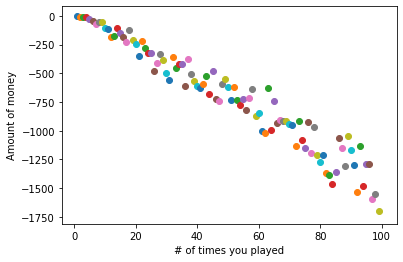

In [226]:
from statistics import mean
results_average = {}
for key in results.keys():
    results_average[key] = mean(results[key])
    plt.scatter(key, results_average[key])
print(results_average)
plt.xlabel("# of times you played")
plt.ylabel("Amount of money")

As it can be seen even if you go fewer times at the casino you are going to end up losing time in the long run if you choose to play High-Low or Red-Black. In fact there is no way of winning at the Casino because the green zero exists. It is even worst in the US Casino because over there you have two greens that will make you lose money. 